# F - Ford Motor Company

In [17]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
%run C:/dev/investing/functions.py

In [19]:
ticker = 'F'
stock = yf.Ticker(ticker)
yearly_balance_sheet = stock.balance_sheet
quarterly_balance_sheet = stock.quarterly_balance_sheet
yearly_cash_flow = stock.cash_flow
quarterly_cash_flow = stock.quarterly_cash_flow
yearly_income_statement = stock.income_stmt
quarterly_income_statement = stock.quarterly_income_stmt

In [4]:
get_basic_info(ticker)


    Name: Ford Motor Company
    Sector: Consumer Cyclical
    Industry: Auto Manufacturers

    Price: $10.16
    Volume: 51,264,227

    Next Earnings: 2025-02-05
    


### About the Company

In [5]:
stock.info['longBusinessSummary']

'Ford Motor Company develops, delivers, and services a range of Ford trucks, commercial cars and vans, sport utility vehicles, and Lincoln luxury vehicles worldwide. It operates through Ford Blue, Ford Model e, and Ford Pro; Ford Next; and Ford Credit segments. The company sells Ford and Lincoln vehicles, service parts, and accessories through distributors and dealers, as well as through dealerships to commercial fleet customers, daily rental car companies, and governments. It also engages in vehicle-related financing and leasing activities to and through automotive dealers. In addition, the company provides retail installment sale contracts for new and used vehicles; and direct financing leases for new vehicles to retail and commercial customers, such as leasing companies, government entities, daily rental companies, and fleet customers. Further, it offers wholesale loans to dealers to finance the purchase of vehicle inventory; and loans to dealers to finance working capital and enhan

##### Company Age

In [6]:
get_company_age(1903)

122 Years


##### CEO

In [7]:
stock.info['companyOfficers'][1]["name"]

'Mr. James Duncan Farley Jr.'

##### Full-Time Employees

In [8]:
"{:,}".format(stock.info['fullTimeEmployees'])

'177,000'

##### Company Culture

Rec to a Friend: 79%  
CEO Approval: 77%

### Insider Activity

##### Percent Owned by Insiders

In [9]:
"{:.2f}%".format(stock.info.get('heldPercentInsiders') * 100)

'0.29%'

This is a low percentage, but this is also an old company, so that is okay here.

##### Last 6 Months Transactions

There have been no insider transactions in the last 6 months.

### Market Cap and Enterprise Value

In [10]:
get_market_cap(ticker)[0]

Market Cap: $40.38B


This is a Large Cap stock.

In [14]:
get_ev(ticker)[0]

Enterprise Value: $172.03B


**<span style="color:red">EV > MC</span>**  

This indicates there is more debt than cash. Where did the debt come from? Is it something that would lead to future growth?

### Financial Indicators

##### P/E 

In [15]:
get_pe(ticker)[0]


    Trailing P/E: 0.88
    Forward P/E: 1.75
    


##### Beta  

<span style="color:red">Risky</span>

In [43]:
stock.info.get("beta", None)

1.636

##### Book Value

In [34]:
get_book_value(ticker)[0]


    Book Value: $171.779B
    Market/Book: 0.24
    


##### D/E (Debt to Equity)

In [20]:
# Total Shareholder Equity
shareholder_equity = None
possible_keys = [
    'Total Shareholder Equity',
    'Stockholders Equity'
]

for key in possible_keys:
    if key in yearly_balance_sheet.index:
        shareholder_equity = quarterly_balance_sheet.loc[key]
        shareholder_equity = shareholder_equity.iloc[0]
        break

# Debt
# short_term_debt
short_term_debt = None
possible_keys = [
    'Total Current Liabilities',
    'Total Liabilities',
    'Current Liabilities'
]
for key in possible_keys:
    if key in quarterly_balance_sheet.index:
        short_term_debt = yearly_balance_sheet.loc[key]
        short_term_debt = short_term_debt.iloc[0] # most recent
        break

# Long term debt
long_term_debt = quarterly_balance_sheet.loc['Total Non Current Liabilities Net Minority Interest']
long_term_debt = long_term_debt.iloc[0]

# total debt
debt = short_term_debt + long_term_debt

# Debt to Equity
if shareholder_equity:
    print(f"{'{:.2f}'.format(debt / shareholder_equity)}")
else:
    print(f"{'{:.2f}'.format(debt / book_value)}")

5.31


##### D/C (Debt to Capital)

In [21]:
# Debt to Capital
if shareholder_equity:
    print(f"{'{:.2f}'.format(debt / (debt + shareholder_equity))}")
else:
    print(f"{'{:.2f}'.format(debt / (debt + book_value))}")

0.84


##### ROE  

Only $0.02 made for every dollar invested.

In [22]:
# Total Shareholder Equity
shareholder_equity = None
possible_keys = [
    'Total Shareholder Equity',
    'Stockholders Equity'
]

for key in possible_keys:
    if key in yearly_balance_sheet.index:
        shareholder_equity = quarterly_balance_sheet.loc[key]
        shareholder_equity = shareholder_equity.iloc[0]
        break

# Net Income
net_income = quarterly_income_statement.loc['Net Income'].iloc[0]

# Return on Equity
if shareholder_equity:
    print(f"{'{:.2f}'.format(net_income / shareholder_equity * 100)}%")
else:
    print(f"{'{:.2f}'.format(net_income / book_value * 100)}%")

2.01%


##### Current Ratio

In [23]:
"{:.2f}".format(total_assets / total_liabilities)

NameError: name 'total_assets' is not defined

##### Inventory Turnover Ratio  

Inventory was turned over around 10 times per year.

In [24]:
# Cost of Good Sold
cogs = yearly_income_statement.loc['Cost Of Revenue']
cogs = cogs.iloc[0]

# Inventory
inventory = yearly_balance_sheet.loc['Inventory']
inventory = inventory.iloc[0]

# Inventory Turnover Ratio
"{:.2f}".format(cogs / inventory)

'10.22'

##### DSI (Days Sales of Inventory)  

It takes a little over a month to sale through inventory.

In [25]:
"{:.2f}".format(inventory / cogs * 365)

'35.70'

### Balance Sheet

##### Cash and Cash Equivalents  

There was a temporary dip in cash in 2022, but otherwise it has been **steady**.

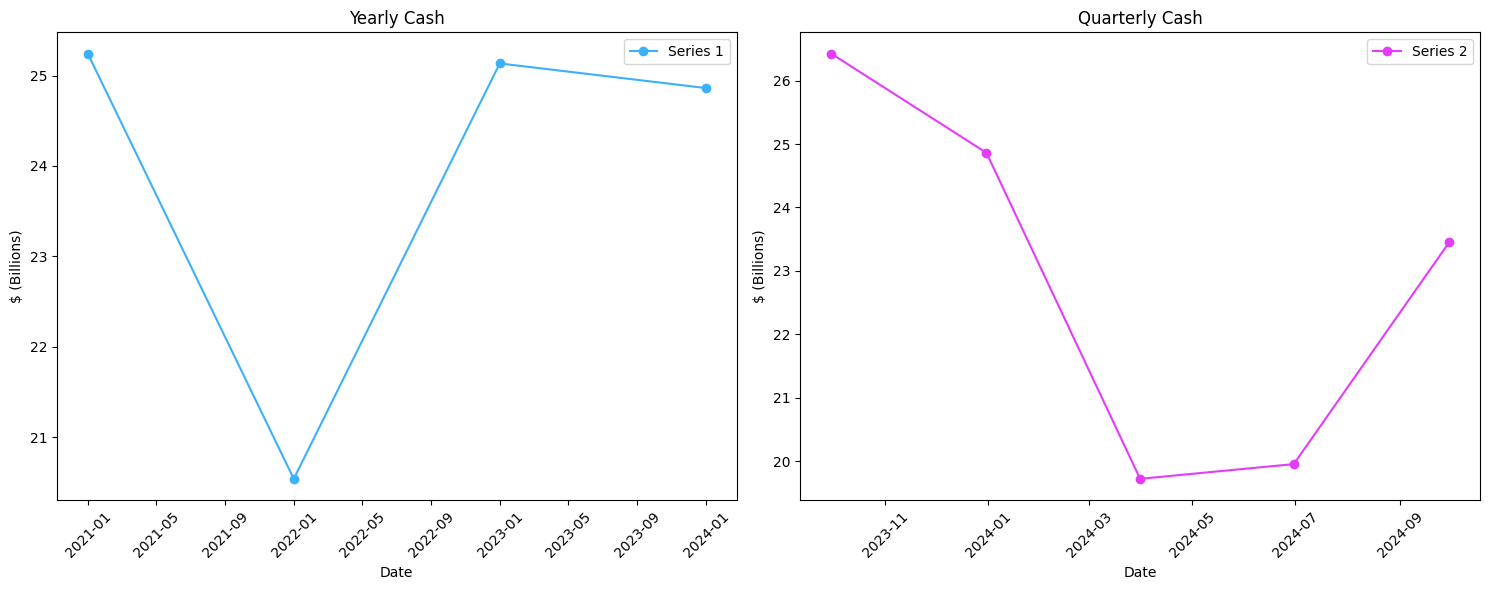

In [26]:
# Series for cash and equivs where index is dates and cash is shown in billions
quarterly_cash_and_equivs = quarterly_balance_sheet.loc['Cash And Cash Equivalents'] / 1000000000
yearly_cash_and_equivs = yearly_balance_sheet.loc['Cash And Cash Equivalents'] / 1000000000

# Create the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Yearly Cash on the first subplot
axes[0].plot(
    yearly_cash_and_equivs.index, 
    yearly_cash_and_equivs.values, 
    marker='o', 
    color='#3cb1fa', 
    linestyle='-', 
    label='Series 1'
)
axes[0].set_title('Yearly Cash')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('$ (Billions)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot Quarterly Cash on the second subplot
axes[1].plot(
    quarterly_cash_and_equivs.index, 
    quarterly_cash_and_equivs.values, 
    marker='o', 
    color='#e43cfa', 
    linestyle='-', 
    label='Series 2'
)
axes[1].set_title('Quarterly Cash')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('$ (Billions)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

##### Long-Term Debt  

Long-term debt has **increased** over the past 2 years. Have there been big investments?

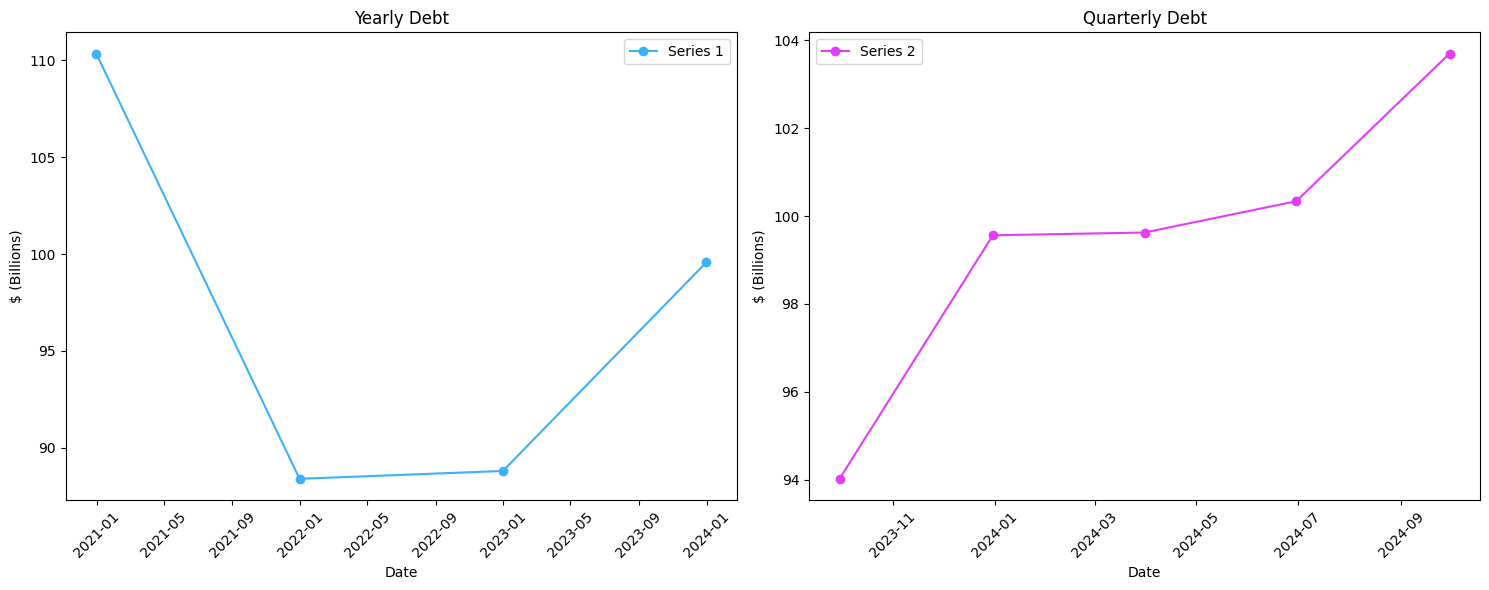

In [27]:
# Series for long term debt where index is dates and debt is shown in Billions
yearly_long_term_debt = yearly_balance_sheet.loc['Long Term Debt'] / 1000000000
quarterly_long_term_debt = quarterly_balance_sheet.loc['Long Term Debt'] / 1000000000

# Create the subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Yearly Debt on the first subplot
axes[0].plot(
    yearly_long_term_debt.index, 
    yearly_long_term_debt.values, 
    marker='o', 
    color='#3cb1fa', 
    linestyle='-', 
    label='Series 1'
)
axes[0].set_title('Yearly Debt')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('$ (Billions)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot Quarterly Debt on the second subplot
axes[1].plot(
    quarterly_long_term_debt.index, 
    quarterly_long_term_debt.values, 
    marker='o', 
    color='#e43cfa', 
    linestyle='-', 
    label='Series 2'
)
axes[1].set_title('Quarterly Debt')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('$ (Billions)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

##### Total Shares Outstanding  


### Cash Flow

In [28]:
# Net Cash Flow by year
yearly_net_cf = None
possible_keys = [
    'Net Cash Flow',
    'Total Cash From Operating Activities',
    'Cash Flow From Continuing Operating Activities'
]
for key in possible_keys:
    if key in yearly_cash_flow.index:
        yearly_net_cf = yearly_cash_flow.loc[key] / 1000000000
        break

# Net Cash Flow by quarter
quarterly_net_cf = None
possible_keys = [
    'Net Cash Flow',
    'Total Cash From Operating Activities',
    'Cash Flow From Continuing Operating Activities'
]
for key in possible_keys:
    if key in quarterly_cash_flow.index:
        quarterly_net_cf = quarterly_cash_flow.loc[key] / 1000000000
        break

# Net Cash Flow by year
yearly_operating_cf = yearly_cash_flow.loc['Operating Cash Flow'] / 1000000000
quarterly_operating_cf = quarterly_cash_flow.loc['Operating Cash Flow'] / 1000000000

yearly_investing_cf = yearly_cash_flow.loc['Investing Cash Flow'] / 1000000000
quarterly_investing_cf = quarterly_cash_flow.loc['Investing Cash Flow'] / 1000000000

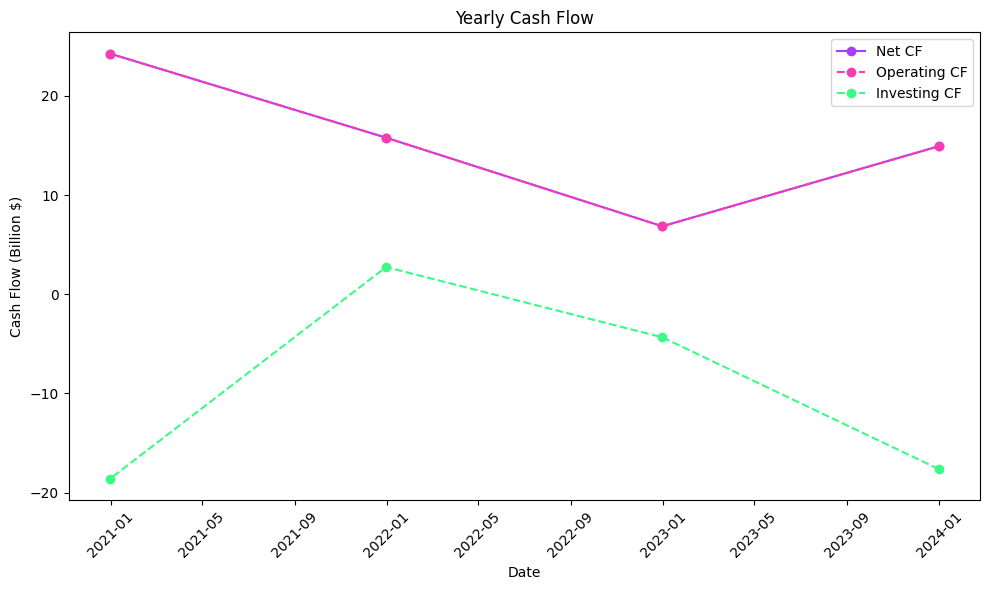

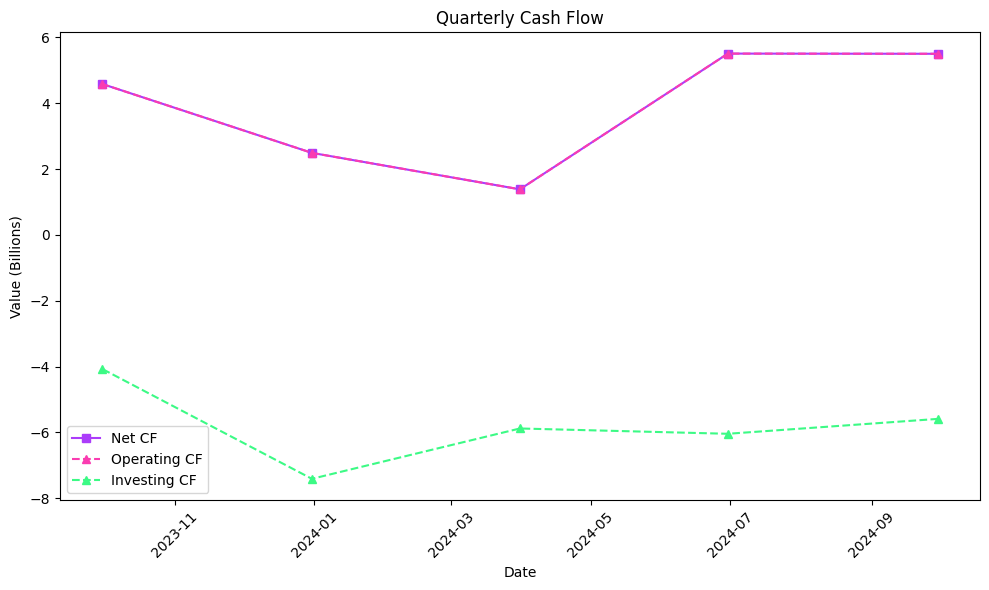

In [29]:
# Yearly net, operating, and investing cash flow
plt.figure(figsize=(10, 6))
plt.plot(
    yearly_net_cf.index, 
    yearly_net_cf.values, 
    marker='o', 
    color='#ab3cfa', 
    linestyle='-', 
    label='Net CF'
)
plt.plot(
    yearly_operating_cf.index, 
    yearly_operating_cf.values, 
    marker='o', 
    color='#fa3cb1', 
    linestyle='--', 
    label='Operating CF'
)
plt.plot(
    yearly_investing_cf.index,
    yearly_investing_cf.values,
    marker='o',
    color='#3cfa85',
    linestyle='--',
    label='Investing CF'
)
plt.title('Yearly Cash Flow')
plt.xlabel('Date')
plt.ylabel('Cash Flow (Billion $)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()

# Quarterly Net, Operating, and Investing Cash Flow
plt.figure(figsize=(10, 6))
plt.plot(
    quarterly_net_cf.index, 
    quarterly_net_cf.values, 
    marker='s', 
    color='#ab3cfa', 
    linestyle='-', 
    label='Net CF'
)
plt.plot(
    quarterly_operating_cf.index, 
    quarterly_operating_cf.values, 
    marker='^', 
    color='#fa3cb1', 
    linestyle='--', 
    label='Operating CF'
)
plt.plot(
    quarterly_investing_cf.index, 
    quarterly_investing_cf.values, 
    marker='^', 
    color='#3cfa85', 
    linestyle='--', 
    label='Investing CF'
)
plt.title('Quarterly Cash Flow')
plt.xlabel('Date')
plt.ylabel('Value (Billions)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()

plt.show()